In [1]:
import math
import os
import sys
import argparse

import pandas as pd
import numpy as np

sys.path.append('..')

from src.IO.IO import IO
from src.util import get_config

%matplotlib inline
import matplotlib.pyplot as plt
from src.prg.prg.prg import create_prg_curve, plot_prg, calc_auprg, plot_pr
plt.rcParams['figure.figsize'] = (6,5)

In [2]:
# absolute path to the config folder
path = "../src/config_files/"
cfg_filename = "config_lbds.yaml"
fn = path + '/' + cfg_filename
if os.path.exists(fn):
    cfg = get_config(fn)
else:
    print("Config file {} couldn't be found at {}, exiting".format(args.configfn, fn))
    exit()

Reading config file


In [3]:
io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]

# get filenames
stats_path = io.grid_search_statistics_path
fn = "grid_search_statistics_B2_iforestres.csv"
stats_csv = io.read_csv(fn, io.grid_search_statistics_path)

pipelines = []
for i in range(stats_csv.shape[0]):
    pipelines.append({'fn':"LBDS_pipeline_2016_B2_iforest_{}.csv".format(stats_csv['id'][i]), 'rank': stats_csv['rank'][i]})

Reading grid_search_statistics_B2_iforestres.csv file


In [4]:
f_path = io.get_pipeline_output_path(ad)

for j in range(len(pipelines)):
    pipelines[j]['truth_and_preds_df'] = io.read_csv(pipelines[j]['fn'], f_path)


Reading LBDS_pipeline_2016_B2_iforest_a403ddc7-1727-42bb-83f0-90f47d95f9df.csv file
Reading LBDS_pipeline_2016_B2_iforest_9f305e66-ad08-4ec9-b8d3-17d57386f49d.csv file
Reading LBDS_pipeline_2016_B2_iforest_b8737bb7-2c2c-4271-9633-daed5aacf6d2.csv file
Reading LBDS_pipeline_2016_B2_iforest_85bef9e3-d598-43dd-8237-77af76c570b9.csv file
Reading LBDS_pipeline_2016_B2_iforest_9813eb74-a22d-4092-8418-0d61cfc223d1.csv file
Reading LBDS_pipeline_2016_B2_iforest_e98e5e8f-e0a6-4324-bc7b-86f03aca0104.csv file
Reading LBDS_pipeline_2016_B2_iforest_c4d73386-a5bd-455e-a2d2-e9be8ce38824.csv file
Reading LBDS_pipeline_2016_B2_iforest_f4b65f32-c619-4088-9e8f-ebc327aeebb7.csv file
Reading LBDS_pipeline_2016_B2_iforest_de7b619e-6e99-4d5c-bef2-6ba7f4cbcda7.csv file
Reading LBDS_pipeline_2016_B2_iforest_000cd16d-d34f-4cfb-b5f7-303a95b2bb72.csv file
Reading LBDS_pipeline_2016_B2_iforest_b77f0a99-e95b-4edb-af1d-0d08ab238424.csv file
Reading LBDS_pipeline_2016_B2_iforest_28116a8b-ec3b-4abd-aee1-96de7fe42490.c

In [5]:
for j in range(len(pipelines)):
    pipelines[j]['truth_and_preds_df'] = pipelines[j]['truth_and_preds_df'].sort_values(by="y_pred", ascending=False)
    pipelines[j]['labels'] = np.array(pipelines[j]['truth_and_preds_df']["y_true"], dtype='int')
    pipelines[j]['scores'] = np.array(pipelines[j]['truth_and_preds_df']["y_pred"])

In [6]:
# add position
def get_index_of_first_true(l):
    for i in range(len(l)):
        if int(l[i]) == 1:
            return i
        elif i == len(l):
            print("No one in list")
            return None

for j in range(len(pipelines)):
    pipelines[j]['first_true_position'] = get_index_of_first_true(pipelines[j]['labels'])

In [7]:
first_true_positions = []
ranks = []
for j in range(len(pipelines)):
    first_true_positions.append(pipelines[j]['first_true_position'])
    ranks.append(pipelines[j]['rank'])

print(first_true_positions)

[11, 4, 7, 14, 1, 4, 4, 5, 8, 13, 0, 6, 1, 6, 11, 8, 4, 2, 2, 5, 6, 2, 1, 1, 9, 0, 4, 2, 1, 5, 0, 9, 13, 0, 0, 2, 14, 4, 3, 5, 21, 0, 1, 0, 4, 16, 2, 3, 10, 1, 0, 8, 14, 0, 6, 4, 1, 1, 2, 1, 4, 9, 5, 10, 6, 0, 6, 0, 20, 3, 9, 8, 25, 2, 8, 4, 4, 8, 1, 5, 4, 11, 17, 3, 7, 10, 6, 7, 33, 5, 1, 4, 1, 1, 6, 11]


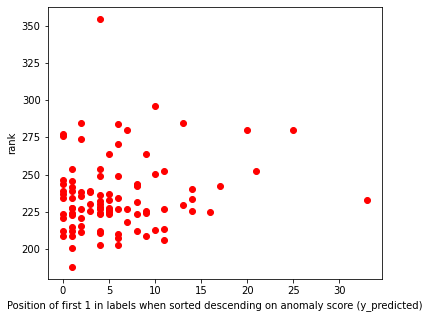

In [8]:
plt.plot(first_true_positions, ranks, 'ro')
plt.xlabel("Position of first 1 in labels when sorted descending on anomaly score (y_predicted)")
plt.ylabel("rank")
plt.show()